In [2]:
import pandas as pd
df_Imdb = pd.read_csv('../Assets/IMDB Dataset.csv')

In [3]:
df_Imdb

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Predictor (Independent Variable) = Review </br>
Target (Dependent Variable) = Sentiment

In [8]:
# take a sample of 10000 rows to make processing faster

# get 9000 positive
df_positive = df_Imdb[df_Imdb['sentiment'] == 'positive'][:9000]

In [9]:
# get 1000 negative rows
df_negative = df_Imdb[df_Imdb['sentiment'] == 'negative'][:1000]

In [11]:
# concatenate vertically
df_reviews_imb = pd.concat([df_positive, df_negative])

In [13]:
# (imb = imbalance , unequal number of samples per class, not equally distributed)
df_reviews_imb.value_counts('sentiment')

sentiment
positive    9000
negative    1000
Name: count, dtype: int64

## Undersampling and Oversampling
are the solutions for the imbalance data

#### Undersampling
Deleting samples from the majority of the class, to get the same number of positive and negative reviews we have to delete the data  from the majority class

#### Oversampling
Increase the number of observations of the minority class, so we have to duplicate the samples of the minority class

<Axes: xlabel='sentiment'>

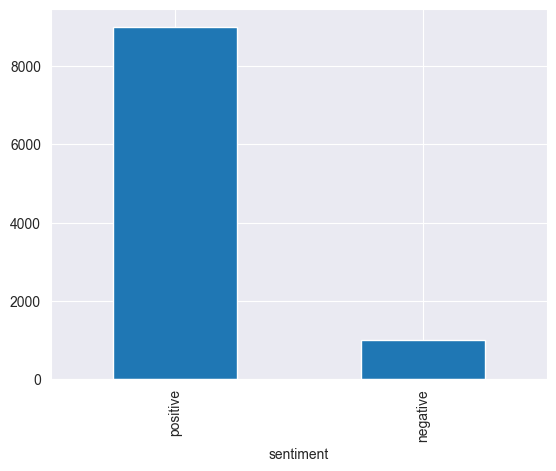

In [14]:
# Dealing with Imbalanced data
df_reviews_imb.value_counts('sentiment').plot(kind='bar')

### Undersample

method 01 - using .sample()

In [15]:
# Balancing data with .sample()
length_negative = len(df_reviews_imb[df_reviews_imb['sentiment']=='negative'])

In [18]:
df_reviews_positive = df_reviews_imb[df_reviews_imb['sentiment']=='positive'].sample(n=length_negative)

In [19]:
df_reviews_positive

,review,sentiment
17019,We viewed the vcr and found it to be fascinati...,positive
13242,"The inspiration for the ""Naked Gun"" movies cas...",positive
11546,"Renoir's tale of Paris,the Cancan,a washer-gir...",positive
3475,When the Grinch came out I was excited though ...,positive
2851,"David Cronenberg, much like colleague David Ly...",positive
...,...,...
1234,The 20th animated Disney classic is often crit...,positive
6978,'Ray' lives on<br /><br />Ray Dir- Taylor Hack...,positive
15733,"Better than it has any right to be, this movie...",positive
2107,In order to stop her homosexual friend Albert ...,positive


In [20]:
df_reviews_negative = df_reviews_imb[df_reviews_imb['sentiment']=='negative']

In [21]:
df_reviews_negative

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
2000,Stranded in Space (1972) MST3K version - a ver...,negative
2005,"I happened to catch this supposed ""horror"" fli...",negative
2007,waste of 1h45 this nasty little film is one to...,negative
2010,Warning: This could spoil your movie. Watch it...,negative


In [25]:
pd.concat([df_reviews_positive, df_reviews_negative]).value_counts('sentiment')

sentiment
negative    1000
positive    1000
Name: count, dtype: int64

In [28]:
df_reviews_bal = pd.concat([df_reviews_positive, df_reviews_negative])

In [29]:
df_reviews_bal

,review,sentiment
17019,We viewed the vcr and found it to be fascinati...,positive
13242,"The inspiration for the ""Naked Gun"" movies cas...",positive
11546,"Renoir's tale of Paris,the Cancan,a washer-gir...",positive
3475,When the Grinch came out I was excited though ...,positive
2851,"David Cronenberg, much like colleague David Ly...",positive
...,...,...
2000,Stranded in Space (1972) MST3K version - a ver...,negative
2005,"I happened to catch this supposed ""horror"" fli...",negative
2007,waste of 1h45 this nasty little film is one to...,negative
2010,Warning: This could spoil your movie. Watch it...,negative


In [40]:
# sort and reset index
df_reviews_bal.reset_index(drop=True, inplace=True)

In [41]:
df_reviews_bal

,review,sentiment
0,Basically there's a family where a little boy ...,negative
1,"This show was an amazing, fresh & innovative i...",negative
2,Encouraged by the positive comments about this...,negative
3,Phil the Alien is one of those quirky films wh...,negative
4,I saw this movie when I was about 12 when it c...,negative
...,...,...
1995,Knute Rockne led an extraordinary life and his...,positive
1996,At the height of the 'Celebrity Big Brother' r...,positive
1997,This is another of Robert Altman's underrated ...,positive
1998,This movie won a special award at Cannes for i...,positive


Method 02 - Balancing data with RandomUnderSampler

In [ ]:
!pip install imblearn

#### # Import RandomOverSampler and do the same for over Sampling


In [67]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
# create instance of random under sampler

##### rus.fit_resample(x,y)
 x - represent the data which has to be sampled </br>
 y - correspond(match) labels for each samples in x

In [68]:
# x - 2D array / unbalance data set , using [[]] return a data set
# y - 1D array / series , [''] return a series
rus.fit_resample(df_reviews_imb[['review']],df_reviews_imb['sentiment'])

# here we get 2 outputs first one is a df with a one column and 2 one is a series

(                                                  review
 3      Basically there's a family where a little boy ...
 7      This show was an amazing, fresh & innovative i...
 8      Encouraged by the positive comments about this...
 10     Phil the Alien is one of those quirky films wh...
 11     I saw this movie when I was about 12 when it c...
 ...                                                  ...
 10833  Knute Rockne led an extraordinary life and his...
 1039   At the height of the 'Celebrity Big Brother' r...
 5255   This is another of Robert Altman's underrated ...
 12237  This movie won a special award at Cannes for i...
 15014  You'd be forgiven to think a Finnish director ...
 
 [2000 rows x 1 columns],
 3        negative
 7        negative
 8        negative
 10       negative
 11       negative
            ...   
 10833    positive
 1039     positive
 5255     positive
 12237    positive
 15014    positive
 Name: sentiment, Length: 2000, dtype: object)

In [69]:
df_reviews_bal, df_reviews_bal['sentiment'] = rus.fit_resample(df_reviews_imb[['review']],df_reviews_imb['sentiment'])

In [70]:
df_reviews_imb.value_counts('sentiment')

sentiment
positive    9000
negative    1000
Name: count, dtype: int64

In [71]:
df_reviews_bal.value_counts('sentiment')

sentiment
negative    1000
positive    1000
Name: count, dtype: int64

## Splitting data into train and test

In [48]:
# import train_test_split
from sklearn.model_selection import train_test_split


In [74]:
# create train and test variables
train,test = train_test_split(df_reviews_bal,test_size=0.33,random_state=42)

In [75]:
# train 60& and test 30%(0.33)
train

,review,sentiment
144,"I just got back from this free screening, and ...",negative
1839,Claire Denis's movies seem to fall into one of...,negative
16588,"One must admit, that Dev has an eye for beauty...",positive
742,Mario Lewis of the Competitive Enterprise Inst...,negative
9464,"The first, and far better, of Kevin Kline's tw...",positive
...,...,...
10644,I saw the movie in Izmir as the closing film o...,positive
16133,This is a great documentary and above comments...,positive
1739,"Obviously, the comments above that fawn over t...",negative
2443,Robert Carlyle excels again. The period was ca...,positive


In [76]:
test

,review,sentiment
11301,Refreshing `lost' gem! Featuring effective dia...,positive
681,Never saw the original movie in the series...I...,negative
7513,"Once upon a time, in Sweden, there was a poor ...",positive
1821,"At the beginning of the film, you might double...",negative
549,Another Spanish movie about the 1936 Civil War...,positive
...,...,...
207,"I have seen most, if not all of the Laurel & H...",negative
7616,D.W. Griffith could have made any film he want...,positive
13483,"Cardiff, Wales. A bunch of 5 mates are deeply ...",positive
1051,I rented this movie with my friend for a good ...,negative


In [77]:
train_x , train_y = train['review'],train['sentiment']

In [78]:
test_x , test_y = test['review'],test['sentiment']


## Bag of Words (BoW)

BoW (Bag of Words) is a simple way to turn text into numbers for machine learning. </br>

👉 It counts how many times each word appears in a sentence — it doesn’t care about word order.</br>

Example:</br>
Sentences:</br>
1️⃣ "I love dogs"</br>
2️⃣ "I love cats"</br>
</br>
Vocabulary: {I, love, dogs, cats}</br>

| Sentence     | I | love | dogs | cats |
|---------------|---|------|------|------|
| I love dogs   | 1 | 1 | 1 | 0 |
| I love cats   | 1 | 1 | 0 | 1 |

That table is your BoW representation — each sentence becomes a list of numbers.

### Text Representation(Bag of Words)

#### Count Vectorizer

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Python. I hate Python code"]

df = pd.DataFrame({'review': ['review1', 'review2'],'text':text})
cv = CountVectorizer(stop_words='english')
cv.fit_transform(df['text'])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

In [56]:
cv_matrix = cv.fit_transform(df['text'])

In [58]:
# dtm -> document term matrix
df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df['review'].values, columns=cv.get_feature_names_out())

In [59]:
df_dtm

,code,hate,love,python,writing
review1,2,0,2,2,1
review2,2,2,0,2,1


### 🧠 TF (Term Frequency) and IDF (Inverse Document Frequency)

**TF-IDF** is a way to measure how important a word is in a document compared to a whole collection of documents.

- **TF (Term Frequency):**
  Shows **how often** a word appears in a single document.
  (More appearances → higher TF)

- **IDF (Inverse Document Frequency):**
  Shows **how unique** a word is across all documents.
  (Common words like “the” or “and” → lower IDF)

When you multiply them (**TF × IDF**),
you get a value that increases for **important and rare words**,
and decreases for **common or less meaningful words**.

---

**Example:**
Search engines like **Google** use TF-IDF–based ideas to find results that match your search —
the pages with words that are both **frequent** in the page and **rare** elsewhere are ranked higher.

---

**In Machine Learning:**
TF-IDF helps convert text into numbers so models can understand which words matter most in a document.

## IDF = log((Total number of sentences+1)/(Number of sentences containing that word+1)) + 1

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Python. I hate Python code"]

df = pd.DataFrame({'review': ['review1', 'review2'],'text':text})
tfidf = TfidfVectorizer(stop_words='english',norm=None)
tfidf.fit_transform(df['text'])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (2, 5)>

In [65]:
tfidf_matrix = tfidf.fit_transform(df['text'])

In [66]:
pd.DataFrame(tfidf_matrix.toarray(), index=df['review'].values, columns=tfidf.get_feature_names_out())

,code,hate,love,python,writing
review1,2.0,0.00000,2.81093,2.0,1.0
review2,2.0,2.81093,0.00000,2.0,1.0


## Turning text data in to  a Numerical Vectors

In [80]:
from  sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit_transform(train_x)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 118834 stored elements and shape (1340, 20625)>

In [82]:
train_x_vector = tfidf.fit_transform(train_x)

In [89]:
test_x_vector = tfidf.transform(test_x)

In [85]:
train_x_vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 118834 stored elements and shape (1340, 20625)>

In [88]:
train_x

144      I just got back from this free screening, and ...
1839     Claire Denis's movies seem to fall into one of...
16588    One must admit, that Dev has an eye for beauty...
742      Mario Lewis of the Competitive Enterprise Inst...
9464     The first, and far better, of Kevin Kline's tw...
                               ...                        
10644    I saw the movie in Izmir as the closing film o...
16133    This is a great documentary and above comments...
1739     Obviously, the comments above that fawn over t...
2443     Robert Carlyle excels again. The period was ca...
1467     A convict serving time comes forward to give t...
Name: review, Length: 1340, dtype: object

In [87]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,index=train_x.index, columns=tfidf.get_feature_names_out())

,00,000,007,01pm,02,04,08,10,100,1000,...,zooming,zooms,zues,zzzzzzzzzzzzzzzzzz,æon,élan,émigré,ísnt,ïn,ünfaithful
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
742,0,0,0,0,0,0,0,0.042791,0,0,...,0,0,0,0,0,0,0,0,0,0
9464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Machine Learning Algorithms
are divided into two parts

#### Supervised Learning
- Models are training using Labeled Data
- Two Types of Common Supervised Learning
    - Regression - predicts a continuous value (Price,Age,Salary)
    - Classification - predicts discrete class labels, predict categories(Male,Female,Spam,Not Spam,Positive-Negative-True negative-false negative)
#### Unsupervised Learning
- Models are training using Unlabeled Data

#### Our Project
- Supervised Learning (because we have labeled input and output data)
- Classification (because we want to predict category of review either positive or negative)
- SVM, Decision Tree , Naive Bayes ,Logistic Regression

## Support Vector Machines(SVM) Algorithm
- is a supervised learning algorithm use in classification programs , Good option for text classification programs because of high speed and good performance with limited samples

In [98]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [99]:
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['A did not like this movie at all'])))

['positive']
['positive']
['negative']


## Decision Tree Algorithm
- It is a supervised learning algorithm that can be used for regression and classification.
- use to build a model that can predict the class or value of the target variable
- How it works
    - start from the root of the tree
    - Each node of the tree will evaluate the record following specific rule
    - Then follow the branch and correspond to the result of the comparison and jump to the next node

In [100]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Naive Bayes
- It is a supervised learning algorithm that uses conditional probabilities to predict the class
- It assumes that every feature is independent, we should always analyse our data before choosing an algorithm
- Naive Bayes algorithm is based on the based theorem
    - p(A|B) = (p(A).p(B|A))/p(B)

In [102]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)
# train_x_vector.toarray() - input as an array otherwise it will return an error

,priors,None
,var_smoothing,1e-09


## Logistic Regression
- It is a supervised learning algorithm that is commonly used for binary classification problems
- Can use to predict whether,
    - customer churn(customers are likely to leave) or not
    - mail spam or not
    - sentiment is negative or not
- Logistic Regression is based on Logistic function(Sigmoid Function) which takes in a value and assign a probability between 0 and 1

In [103]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_x_vector.toarray(), train_y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'
